# Importation des librairies

In [2]:
import ipywidgets as widgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from sklearn.preprocessing import StandardScaler

# Nettoyage et préparation des données
On importe ici le jeu de données précedemment récupéré en scrapant le site internet "nba.com". On va alors les nettoyer en y retirant les caractères non voulus,les valeurs manquantes et les doublons.

In [3]:
#  load nbaPlayersAllTimesAgilityData.csv, nbaPlayersAllTimesInfoData and nbaPlayersAllTimesShootingData.csv
dfAg = pd.read_csv('nbaPlayersAllTimesAgilityData.csv')
# dfIn = pd.read_csv('nbaPlayersAllTimesInfo.csv')
dfStats = pd.read_csv('nbaPlayersAllTimesStatsData.csv')


#  remove ' ' from column names /!\ invisible characters
dfAg.columns = dfAg.columns.str.replace(' ', ' ')
# dfIn.columns = dfIn.columns.str.replace(' ', ' ')
dfStats.columns = dfStats.columns.str.replace(' ', ' ')

# remane colum Player to PLAYER
# dfIn = dfIn.rename(columns={'Player': 'PLAYER'})

# remove space in playerName
dfAg['PLAYER'] = dfAg['PLAYER'].str.replace(' ', '')
# dfIn['PLAYER'] = dfIn['PLAYER'].str.replace(' ', '')
dfStats['PLAYER'] = dfStats['PLAYER'].str.replace(' ', '')

# remove duplicates
dfAg = dfAg.drop_duplicates(subset=['PLAYER'], keep='first')
# dfIn = dfIn.drop_duplicates(subset=['PLAYER'], keep='first')
dfStats = dfStats.drop_duplicates(subset=['PLAYER'], keep='first')

# add the 3 dataframes
df = pd.merge(dfAg, dfStats, on='PLAYER', how='outer')
# df = pd.merge(df, dfIn, on='PLAYER', how='outer')

# remove the space in the column GP
df['GP'] = df['GP'].str.replace(' ', '')

# # replace every value egal to '-' with the mean of the other value in the columns
df = df.replace('-', np.nan)
df = df.replace(0, np.nan)
df = df.apply(pd.to_numeric, errors='ignore')

for col in df.columns:
  # if the column do not contain string
    if df[col].dtype != 'object':
        # replace the nan value with the mean of the column
        df[col] = df[col].fillna(df[col].mean())



# convert player name to string
df['PLAYER'] = df['PLAYER'].astype(str)

print(df.shape)

# convert inch to meters and round to decimal
df['Max Vertical Leap (inches)'] = df['Max Vertical Leap (inches)'].apply(pd.to_numeric)
df['Max Vertical Leap (cmeters)'] = round(df['Max Vertical Leap (inches)'] * 0.0254, 2)*100

# convert inch to meters and round to decimal
df['Standing Vertical Leap (inches)'] = df['Standing Vertical Leap (inches)'].apply(pd.to_numeric)
df['Standing Vertical Leap (cmeters)'] = round(df['Standing Vertical Leap (inches)'] * 0.0254, 2)*100

# remove inch columns
df = df.drop(['Max Vertical Leap (inches)', 'Standing Vertical Leap (inches)'], axis=1)

# remove none numeric columns
df1 = df.select_dtypes(exclude=['object'])
print(df1.shape)

(5205, 30)
(5205, 27)


# But : 
Demander à l'utilisateur de rentrer un nom de joueur et de lui afficher et comparer la statistique de son choix à celle de ses coéquipiers.
<br> 

## Instruction : 
> **Il est nécessaire de lancer cette cellule individuellement (après avoir effectuer le data cleaning) afin de récupérer toutes intéractions utilisateur.**

1. Choisir un joueur a analyser au format prenomnom (ex: lebronjames)
2. Choisir une statistique a analyser (ex: PTS)

<br>

> *Exemple de joueur à tester : lebronjames, rudygobert, pepesanchez*

What do you want to know about rudygobert ?


Dropdown(description='Skill:', index=18, options=('PLAYER', 'POS', 'Lane Agility Time (seconds)', 'Shuttle Run…

The stat "FT%" of rudygobert is 63.9
The average "FT%" is 70.64927015495161
rudygobert is 0.9 times below the average


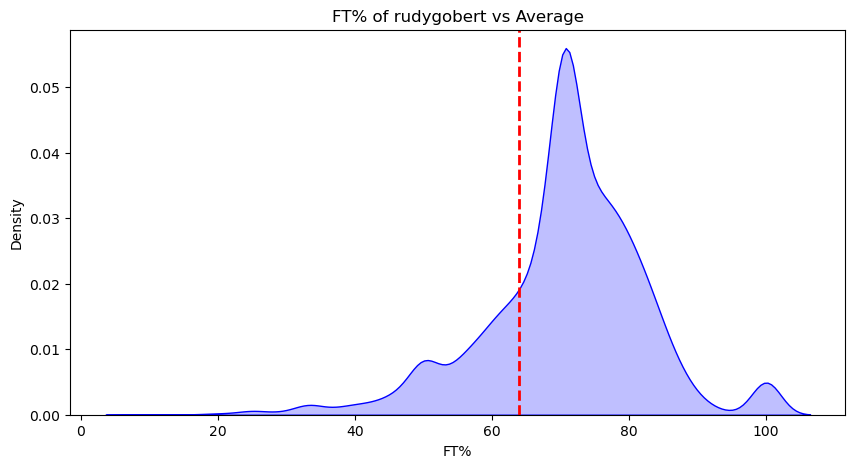

In [6]:
name = input("Enter the name of the player : ").lower().replace(' ', '')
playersName = df['PLAYER'].map(str.lower)

# while the user prompts a player name that is not in the database
while(name not in playersName.values):
   print("Player ", name ," not found")
   name = input("Enter the name of the player : ").lower().replace(' ', '')

clear_output()
print("Begin analysis of", name)
print("What do you want to know about", name, "?")

#chosen player
player = df[df['PLAYER'].str.lower() == name]

# when the user choose a stat from the dropdown menu
def on_change(change):
    if(change['name'] == 'value'):
        clear_output()
        print("What do you want to know about", name, "?")
        display(skill)
        displayStat(change['new'], player)

# displays the chosen stat along with a grpah comparing it to other players
def displayStat(stat, player=player):
    print(f"The stat \"{stat}\" of {name} is {player[stat].values[0]}")

    # try to display the stat if its a number
    try:
        average = df[stat].mean()
        print(f"The average \"{stat}\" is {average}")
        if(average > player[stat].values[0]):
            print(f"{name} is {round(player[stat].values[0] / average,2)} times below the average")
        else:
            print(f"{name} is {round(player[stat].values[0] / average, 2)} times better than the average")

        #show player stat vs average
        plt.figure(figsize=(10, 5))
        sns.kdeplot(df[stat], shade=True, color="b", label="Average")
        plt.axvline(player[stat].values[0], color='r', linestyle='dashed', linewidth=2)
        plt.title(f"{stat} of {name} vs Average")
        plt.show()

    # else raise an error
    except:
        print("Statistic unavailable")
    
# dropdown widget
skill = widgets.Dropdown(
    options=player.columns,
    value='PTS',
    disabled=False,
    description='Skill:',
)
skill.observe(on_change)
display(skill)
displayStat(skill.value)

# But : 
Demander à l'utilisateur une statistique et afficher le meilleur joueur en fonction de cette statistique.

## Instruction : 
> **Il est nécessaire de lancer cette cellule individuellement (après avoir effectuer le data cleaning) afin de récupérer toutes intéractions utilisateur.**

In [5]:
def on_change1(change):
    if(change['name'] == 'value'):
        try:
            stat1 = change['new']
            # print the best player in this stat
            print(f"The best player in {stat1} is {df[df[stat1] == df[stat1].max()]['PLAYER'].values[0]}")
        except:
            print("Statistic unavailable")


skill1 = widgets.Dropdown(
    options=player.columns,
    value='PTS',
    disabled=False,
    description='Skill:',
)
skill1.observe(on_change1)

display(skill1)



Dropdown(description='Skill:', index=9, options=('PLAYER', 'POS', 'Lane Agility Time (seconds)', 'Shuttle Run …